In [1]:
import tensorflow as tf
from keras import regularizers
import matplotlib.pyplot as plt 
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense , Flatten , BatchNormalization , Dropout , Conv2D , MaxPooling2D

2024-01-21 16:37:55.153141: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-21 16:37:56.502071: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Fetching data from directory (generator)
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory = 'data/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.


2024-01-21 16:38:58.143899: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-21 16:38:58.415041: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-21 16:38:58.415384: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-21 16:38:58.417697: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-21 16:38:58.417951: I tensorflow/compile

In [3]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory = 'data/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)


Found 5000 files belonging to 2 classes.


In [4]:
# Normalize
def process(image , label ):
    image = tf.cast( image/255 , tf.float32)
    return image , label 

train_ds = train_ds.map(process)    
test_ds = test_ds.map(process)

In [16]:
# Creating CNN model

model = Sequential()

model.add(Conv2D(32 , kernel_size=(3,3) , strides=(1,1) , padding="valid" , activation='relu' , input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2) , strides=2 , padding="valid"))

model.add(Conv2D(64 , kernel_size=(3,3) , strides=(1,1) , padding="valid" , activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2) , strides=2 , padding="valid"))

model.add(Conv2D(64 , kernel_size=(3,3) , strides=(1,1) , padding="valid" , activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2) , strides=2 , padding="valid"))

model.add(Conv2D(64 , kernel_size=(3,3) , strides=(1,1) , padding="valid" , activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2) , strides=2 , padding="valid"))

model.add(Flatten())

model.add(Dense(128,activation='relu', kernel_regularizer=regularizers.l2(0.05)))
model.add(Dropout(0.07))
model.add(Dense(64,activation='relu' , kernel_regularizer=regularizers.l1(0.05)))
model.add(Dropout(0.07))
model.add(Dense(32,activation='relu' ))

model.add(Dense(1 , activation='sigmoid'))


In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_2 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_3 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [17]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
history = model.fit( train_ds , epochs=20 , validation_data=test_ds )

Epoch 1/20


2024-01-21 17:00:31.694864: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



625/625 [==============================] - 62s 91ms/step - loss: 5.0356 - accuracy: 0.6513 - val_loss: 0.7420 - val_accuracy: 0.6448
Epoch 2/20
625/625 [==============================] - 53s 84ms/step - loss: 0.6544 - accuracy: 0.7465 - val_loss: 0.6241 - val_accuracy: 0.7580
Epoch 3/20
625/625 [==============================] - 53s 85ms/step - loss: 0.5961 - accuracy: 0.7983 - val_loss: 0.6032 - val_accuracy: 0.7920
Epoch 4/20
625/625 [==============================] - 53s 84ms/step - loss: 0.5312 - accuracy: 0.8306 - val_loss: 0.5696 - val_accuracy: 0.8032
Epoch 5/20
625/625 [==============================] - 52s 83ms/step - loss: 0.4642 - accuracy: 0.8580 - val_loss: 0.6040 - val_accuracy: 0.7828
Epoch 6/20
625/625 [==============================] - 53s 83ms/step - loss: 0.4309 - accuracy: 0.8715 - val_loss: 0.4500 - val_accuracy: 0.8566
Epoch 7/20
625/625 [==============================] - 53s 84ms/step - loss: 0.4034 - accuracy: 0.8831 - val_loss: 0.7145 - val_accuracy: 0.7538
Epo

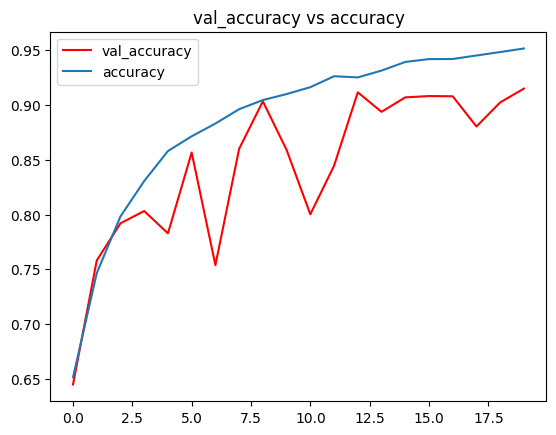

In [19]:
plt.plot(history.history['val_accuracy'] , 'red' , label='val_accuracy' )
plt.plot(history.history['accuracy'] , label='accuracy')
plt.title('val_accuracy vs accuracy')
plt.legend()

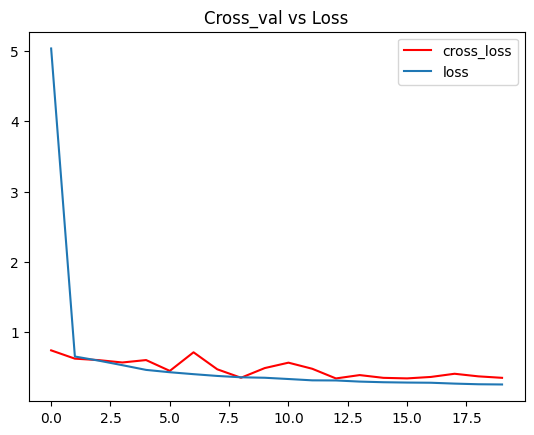

In [20]:
plt.plot(history.history['val_loss'] , 'red' , label='cross_loss' )
plt.plot(history.history['loss'] , label='loss')
plt.title('Cross_val vs Loss')
plt.legend()

1/1 [==============================] - 0s 123ms/step
The image is a cat


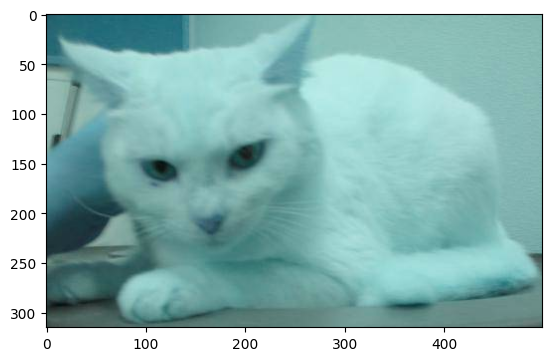

In [21]:
import cv2 
Image = cv2.imread('cat.13.jpg')
plt.imshow(Image)
Image = cv2.resize(Image,(256,256))
output = model.predict(Image.reshape((1,256,256,3)))
if int(output) == 1:
    print("The image is a dog")
else:
    print("The image is a cat")

1/1 [==============================] - 0s 16ms/step
The image is a dog


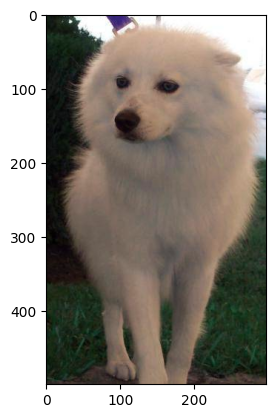

In [22]:
Image = cv2.imread('dog.31.jpg')
plt.imshow(Image)
Image = cv2.resize(Image,(256,256))
output = model.predict(Image.reshape((1,256,256,3)))
if int(output) == 1:
    print("The image is a dog")
else:
    print("The image is a cat")